In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
sys.path.append('../Protocols')
sys.path.append('../Lib')
sys.path.append('../Models')
import simulator_scipy
import model_response
from br1977 import BR1977
from ord2011JK_v1 import ORD2011

import mod_trace as trace

In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
ga_result = 0
def plot_current_conributions():
    trial_conditions = "trial_steps_ramps_ORD2011_288_51_4_-121_61"
    currents = []
    
    if 'ORD2011' in trial_conditions:
        currents = ['I_Na', 'I_NaL', 'I_to', 'I_CaL', 'I_Kr', 'I_Ks', 'I_K1' ]         
    elif 'BR1977' in trial_conditions:
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_artefact_False', 'rb'))
                
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        print(protocol)
        
        model = None
        if 'ORD2011' in trial_conditions:
            model = ORD2011(protocol)
        elif 'BR1977' in trial_conditions:
            model = BR1977(protocol)  
        
        
        tr = model_response.get_model_response_JK(model, protocol)
        # k = kernik.KernikModel(is_exp_artefact=True)        
        # tr = k.generate_response(proto, is_no_ion_selective=False)

        tr.plot_currents_contribution(current, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')


In [5]:
def main():
    plot_current_conributions()    

|STEP: Voltage: -21.192033920500112, Duration: 752.649246303894| + |RAMP: Voltage Start: -14.675028340347374, Voltage End: -113.96608561075345, Duration: 107.30327594652503| + |RAMP: Voltage Start: -34.9671903327344, Voltage End: 41.237066608083424, Duration: 99.59121016877876| + |RAMP: Voltage Start: -31.78415487229718, Voltage End: -67.57348032772873, Duration: 903.9897535470996|
There is no pre-step simulation.


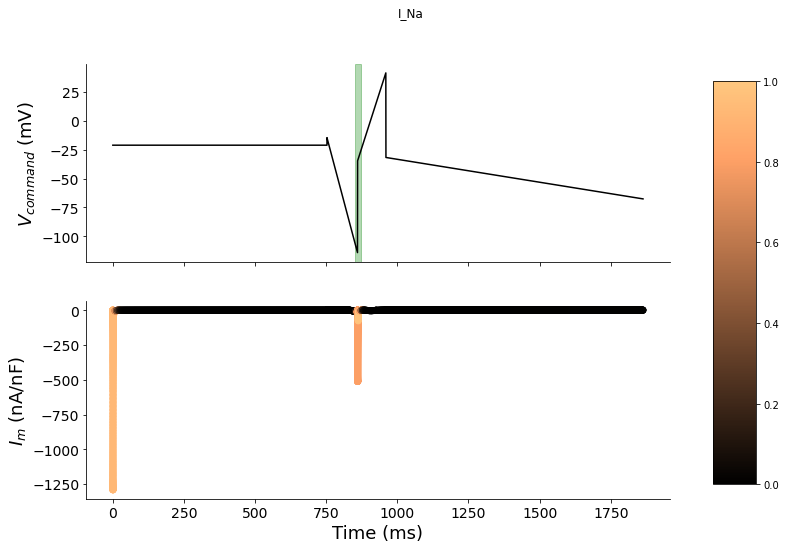

|STEP: Voltage: -120.6344015725005, Duration: 935.1762171406123| + |STEP: Voltage: -120.6344015725005, Duration: 935.1762171406123| + |STEP: Voltage: -120.87421944716017, Duration: 793.1991111789367| + |RAMP: Voltage Start: -2.7713276542567864, Voltage End: -74.84213289644316, Duration: 112.79607720327556|
There is no pre-step simulation.


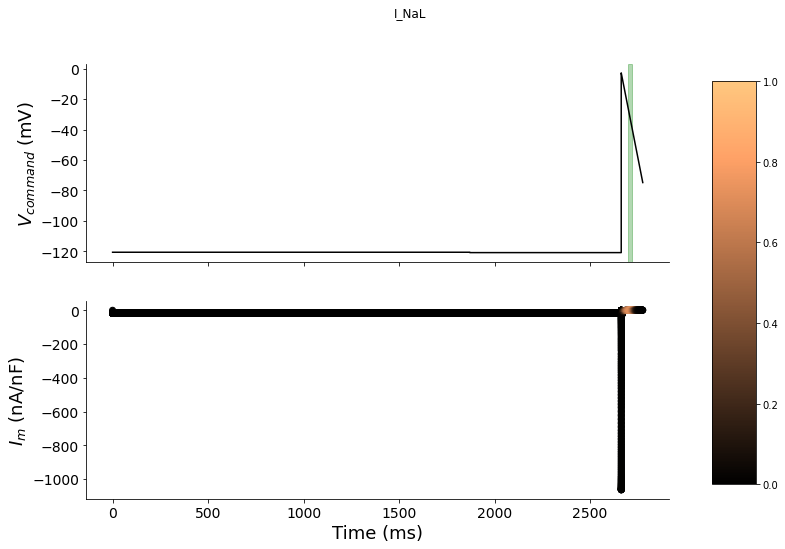

|STEP: Voltage: -65.54247754948985, Duration: 749.2852608248462| + |STEP: Voltage: 60.89878539050991, Duration: 193.77961433249078| + |RAMP: Voltage Start: -110.7050790238336, Voltage End: -88.39674459614254, Duration: 75.51621058382167| + |STEP: Voltage: 51.5220125532698, Duration: 219.64679605719883|
There is no pre-step simulation.


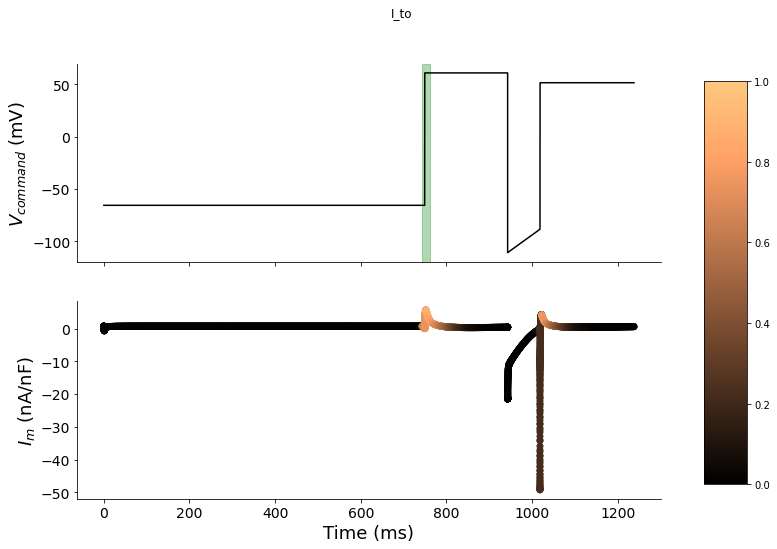

|RAMP: Voltage Start: -20.69020412379536, Voltage End: -20.66290042953395, Duration: 771.465746575979| + |RAMP: Voltage Start: -22.683087039960455, Voltage End: -29.762700620908646, Duration: 959.092302865946| + |STEP: Voltage: -28.957941546931057, Duration: 963.3792209240725| + |STEP: Voltage: 0.6112568316497514, Duration: 633.9335738258753|
There is no pre-step simulation.


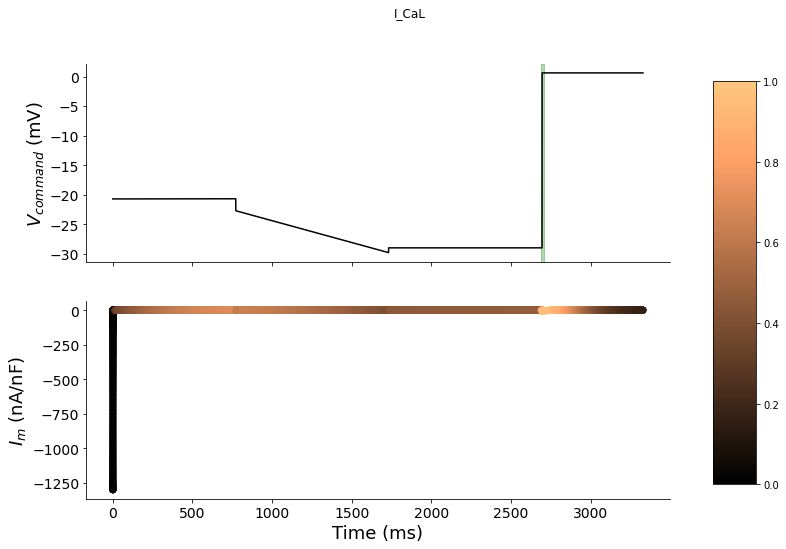

|RAMP: Voltage Start: -66.36481497957497, Voltage End: -41.570044348103565, Duration: 972.5232749899922| + |RAMP: Voltage Start: -50.826050706267274, Voltage End: -51.37511358568, Duration: 975.13569257601| + |RAMP: Voltage Start: -55.95393323020335, Voltage End: -39.00427836784277, Duration: 791.0031061710046| + |RAMP: Voltage Start: 60.79504462374705, Voltage End: -111.35154599817501, Duration: 193.41155378392398|
There is no pre-step simulation.


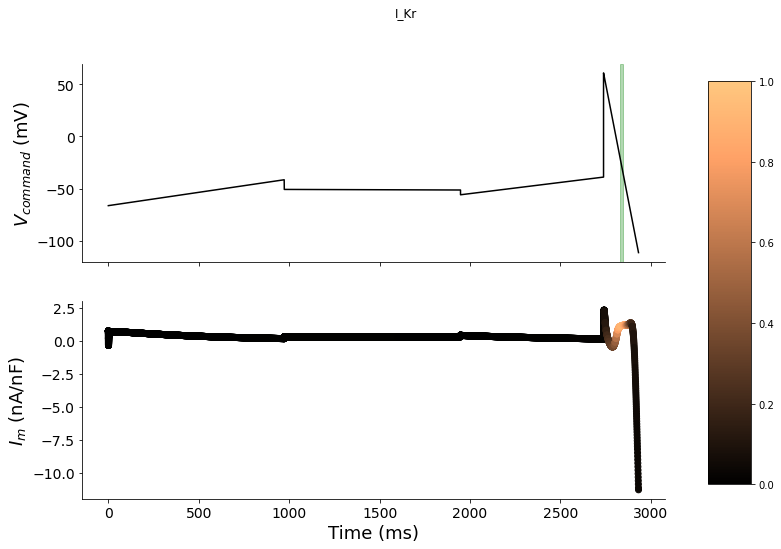

|STEP: Voltage: 55.841025567486014, Duration: 778.0961575699066| + |STEP: Voltage: -110.78724662808052, Duration: 215.98659268860592| + |STEP: Voltage: 52.420827824481165, Duration: 803.4812400961757| + |STEP: Voltage: -87.90281464332278, Duration: 149.80341916182826|
There is no pre-step simulation.


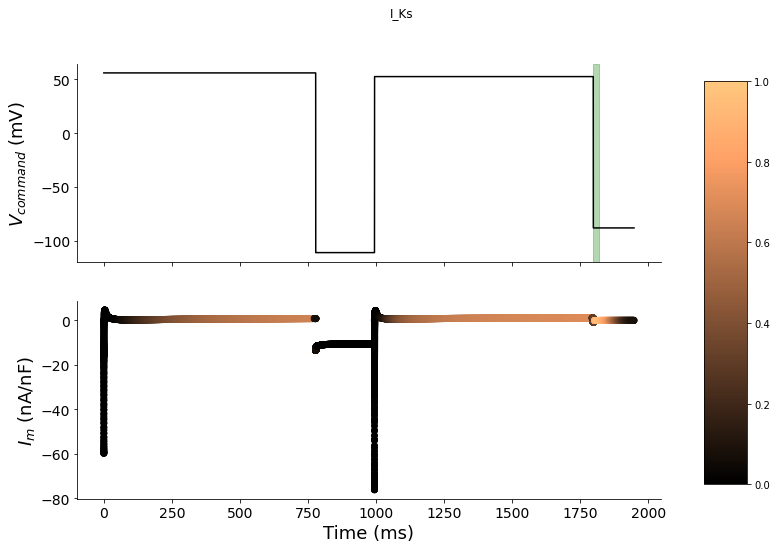

|STEP: Voltage: -120.04876079755695, Duration: 859.0840221378263| + |STEP: Voltage: -117.9020919285784, Duration: 932.4293405869558| + |STEP: Voltage: -101.31965783015615, Duration: 505.44823047040956| + |STEP: Voltage: -120.99354601482024, Duration: 521.9485683864564|
There is no pre-step simulation.


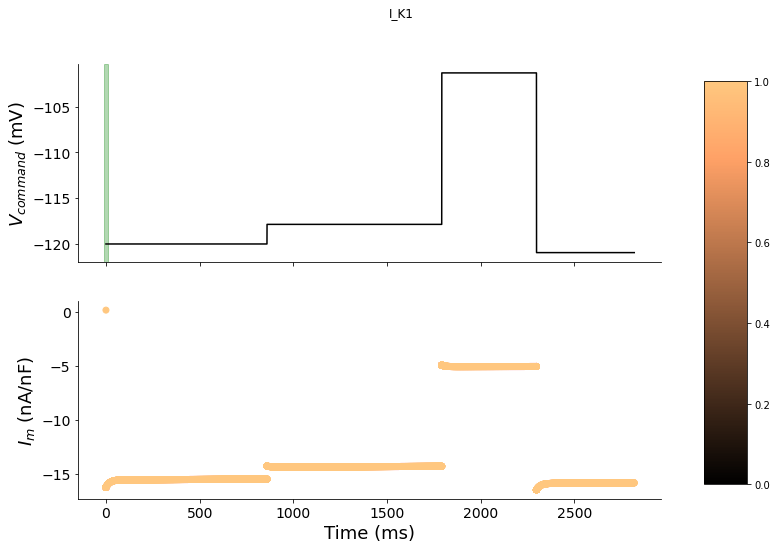

=====Complete==============================


In [6]:
if __name__ == '__main__':
    main()
    print("=====Complete==============================")